Load the the digits data with Scikit-Learn


In [113]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import eigh
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import pandas as pd
from sklearn.pipeline import Pipeline

In [77]:
#Load the digits dataset
digits = datasets.load_digits()

In [100]:
X=digits.data/50
X.shape

(1797, 64)

In [101]:
y = digits.target
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Fit PCA to 64-components and plot the cumulative sum of the ‘pca.explained_variance_ratio_’

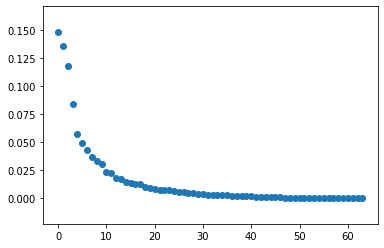

In [102]:
pca = PCA(n_components=64)
comps = pca.fit_transform(X)
plot = pca.explained_variance_ratio_
x = [i for i in range(64)]
plt.scatter(x, plot)

Identify the number of components required for ~90% explained variance (only for PCA).


In [103]:
cum = 0
x = 0
while cum < 0.9:
    cum += plot[x]
    x += 1
    
x

21

List the top 2 components, generate a color-coded scatter plot for the first two components.

In [104]:
comps

array([[-2.51893290e-02,  4.25497670e-01, -1.89261092e-01, ...,
        -0.00000000e+00,  0.00000000e+00,  8.92282311e-16],
       [ 1.59152226e-01, -4.15373979e-01,  8.87901208e-02, ...,
         2.12151400e-17,  3.43345138e-17,  3.34092786e-18],
       [ 1.39838459e-01, -1.99119728e-01,  5.91711616e-02, ...,
         1.33685763e-17,  1.59556687e-17,  2.33308504e-18],
       ...,
       [ 2.16025674e-01, -1.39205045e-01,  1.11991091e-01, ...,
         1.36826663e-18, -5.58655255e-18,  1.94161968e-18],
       [-9.74420018e-02,  2.48479072e-01, -2.03417327e-01, ...,
         2.19525600e-18, -7.13413006e-19, -2.47525755e-18],
       [-6.88779262e-03,  1.27310984e-01,  2.15474170e-01, ...,
        -2.45054374e-18, -1.77089441e-18,  5.41341933e-18]])

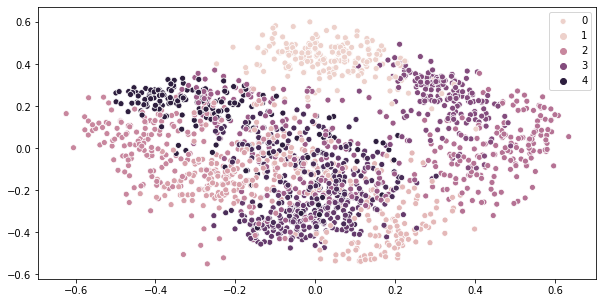

In [117]:
plt.figure(figsize=(10,5))
sns.scatterplot(comps[:,0], comps[:,1], hue = y)
plt.legend(y)

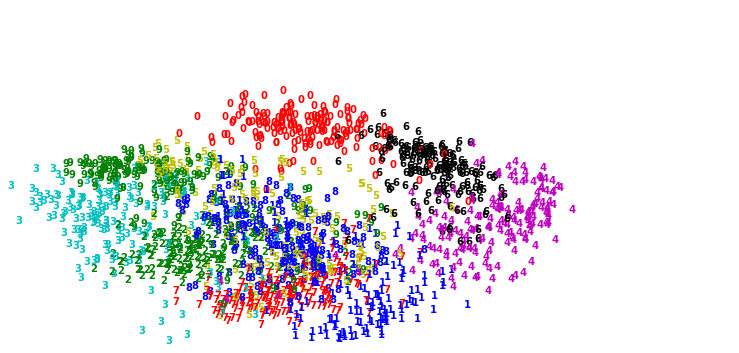

In [124]:

plt.figure(figsize=(8,4))
colours = ["r","b","g","c","m","y","k","r","b","g","c"]
for i in range(comps.shape[0]):
    plt.text(comps[i, 0], comps[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 10}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

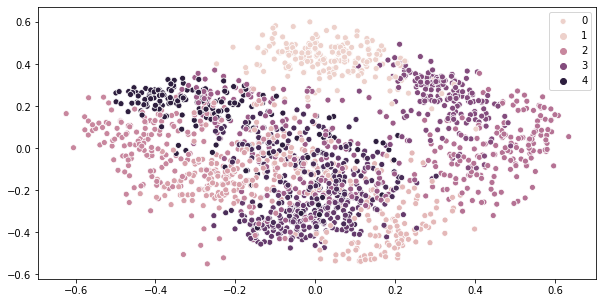

In [125]:
plt.figure(figsize=(10,5))
sns.scatterplot(comps[:,0], comps[:,1], hue = y)
plt.legend(y)

Repeat steps 2 and 4 using Kernel-PCA with RBF, and Kernel-PCA with Poly kernels. For your kernel-PCA experiments try to identify the optimal value of gamma.

In [51]:
kcomps.shape

(1797, 64)

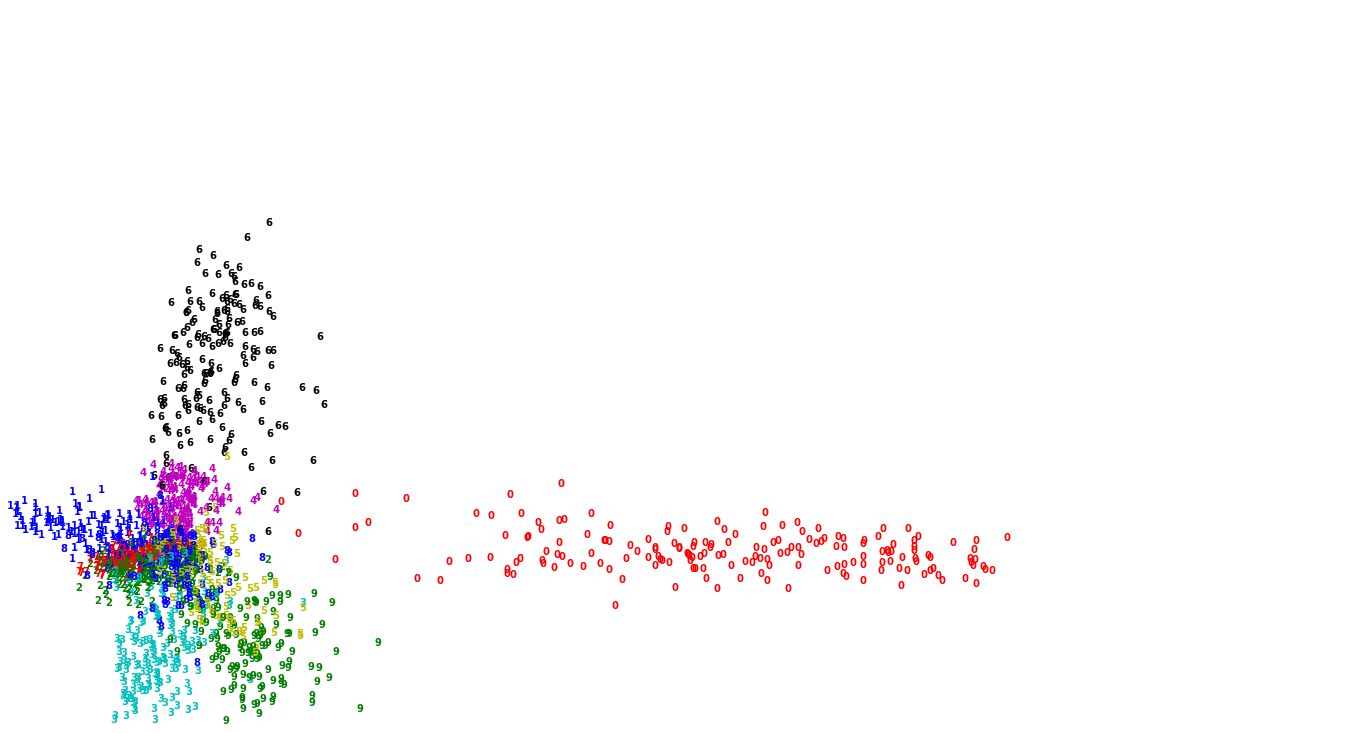

In [145]:
kpcarbf = KernelPCA(n_components=64, kernel = 'rbf', gamma = 5)
kcompsrbf = kpcarbf.fit_transform(X)


plt.figure(figsize=(20,10))
colours = ["r","b","g","c","m","y","k","r","b","g","c"]
for i in range(kcompsrbf.shape[0]):
    plt.text(kcompsrbf[i, 0], kcompsrbf[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 10}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

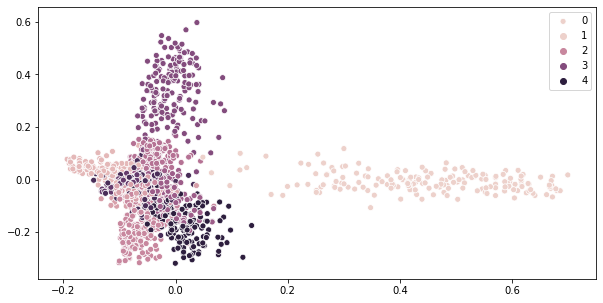

In [146]:
plt.figure(figsize=(10,5))
sns.scatterplot(kcompsrbf[:,0], kcompsrbf[:,1], hue = y)
plt.legend(y)

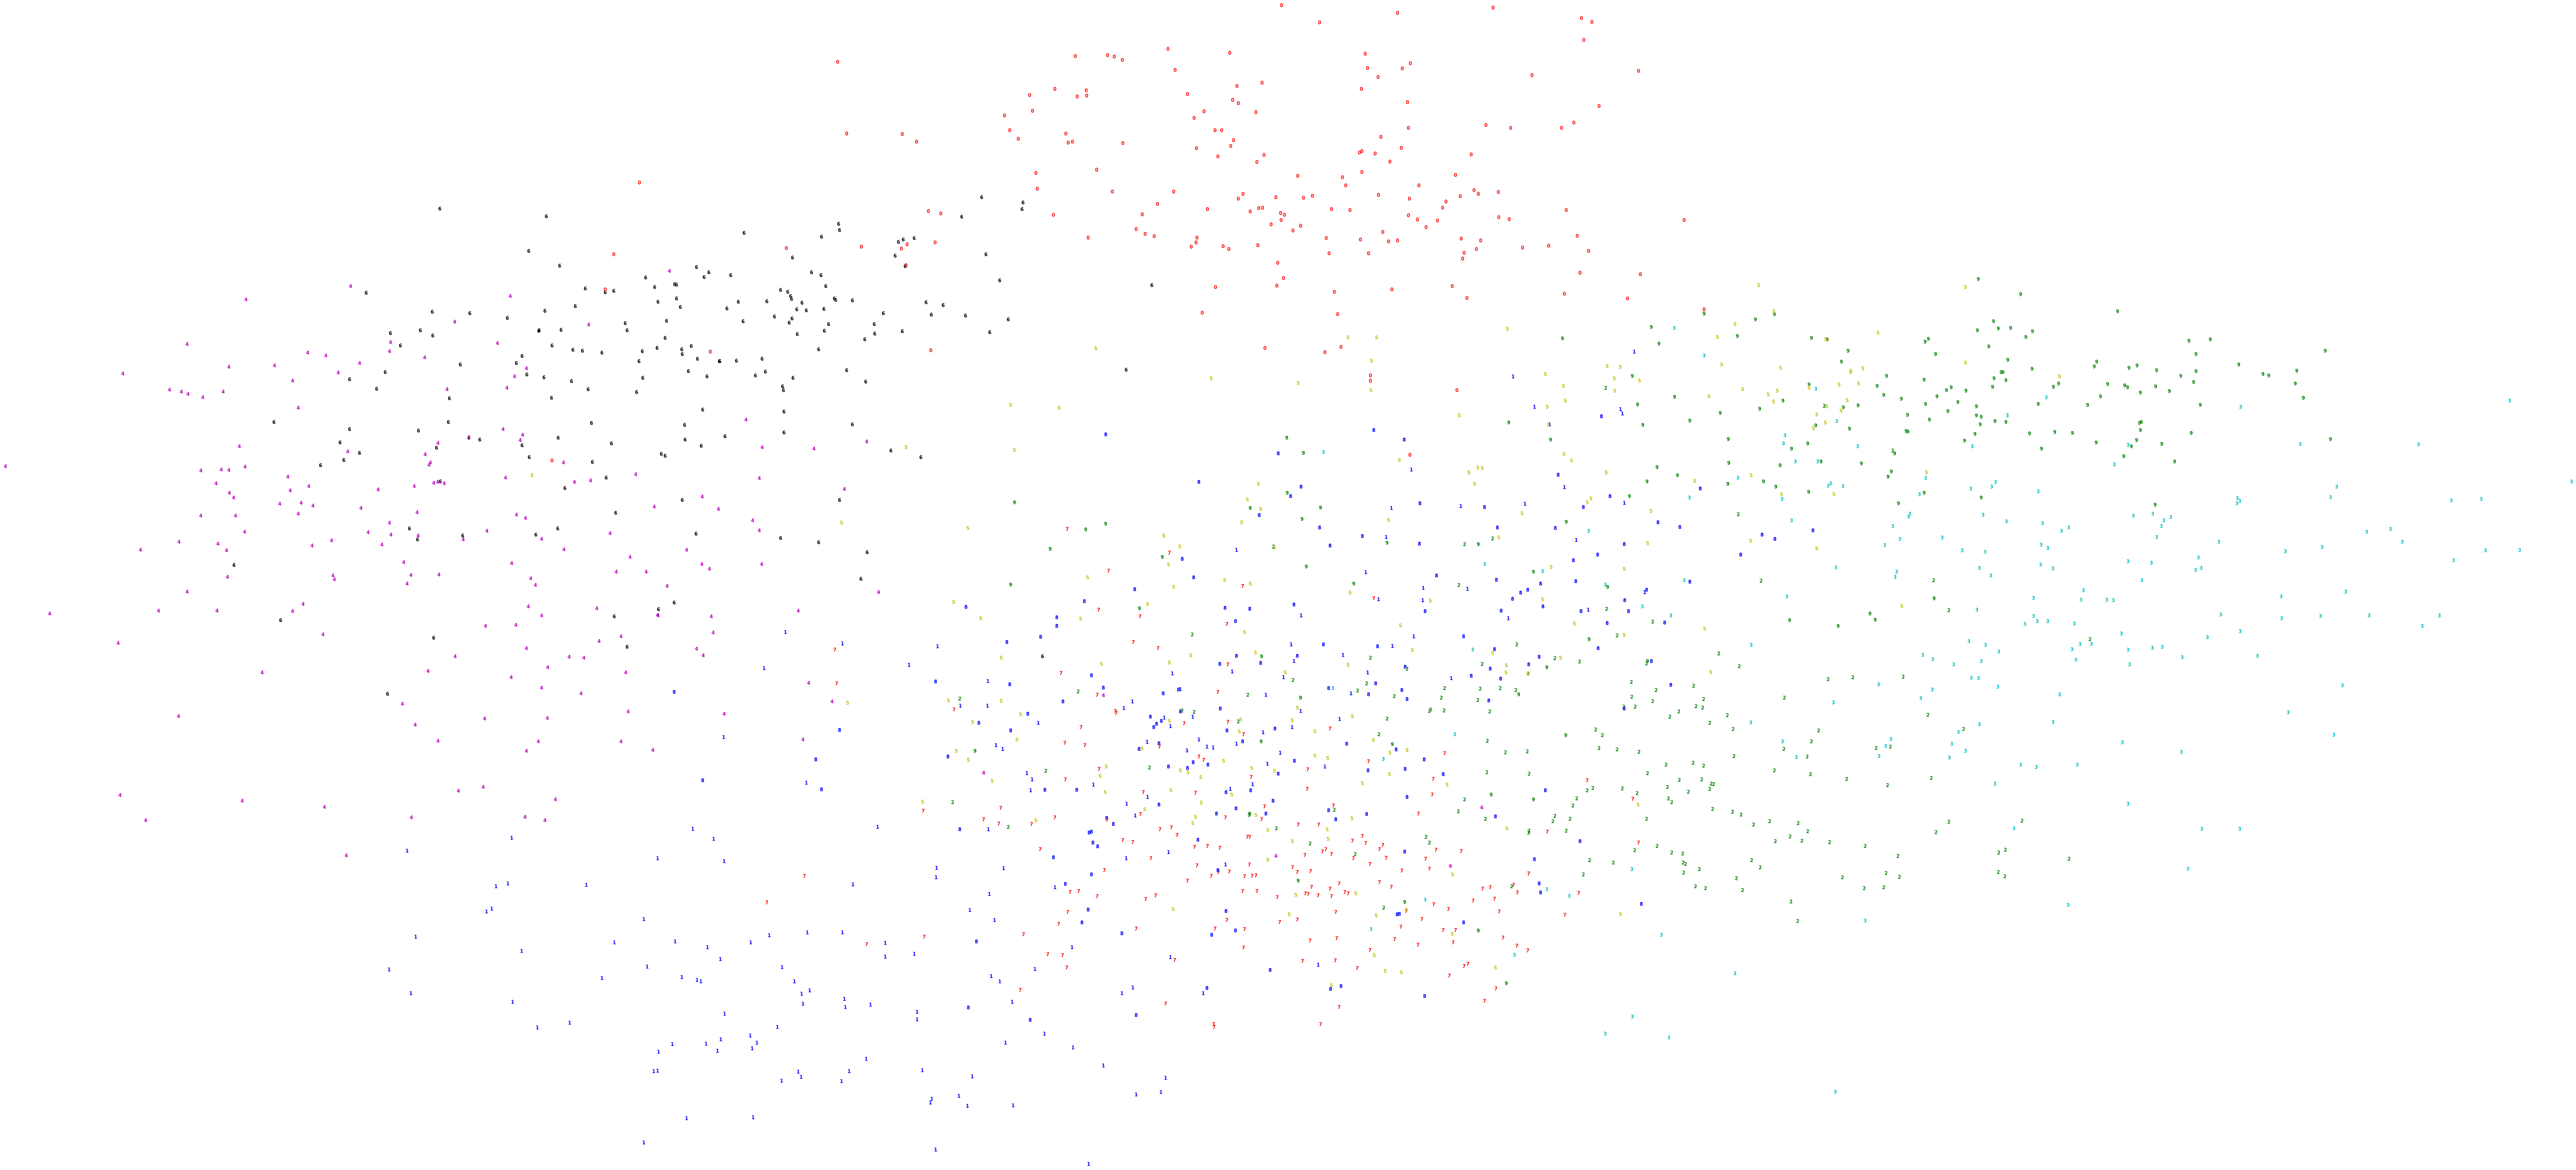

In [164]:
kpcapoly = KernelPCA(n_components=64, kernel = 'poly', gamma =1)
kcompspoly = kpcapoly.fit_transform(X)


plt.figure(figsize=(20,10))
colours = ["r","b","g","c","m","y","k","r","b","g","c"]
for i in range(kcompspoly.shape[0]):
    plt.text(kcompspoly[i, 0], kcompspoly[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 10}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

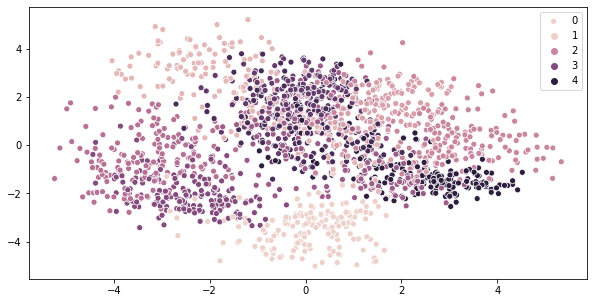

In [158]:
plt.figure(figsize=(10,5))
sns.scatterplot(kcompspoly[:,0], kcompspoly[:,1], hue = y)
plt.legend(y)

In [159]:
import random
plt.figure(figsize=(5,3))
c = []
for _ in range(len(np.unique(y))):
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    c.append(color)
c
color

(0.791327510780789, 0.7495841751420786, 0.9958762206750472)

<Figure size 360x216 with 0 Axes>

Record your observations and identify your top performing model.

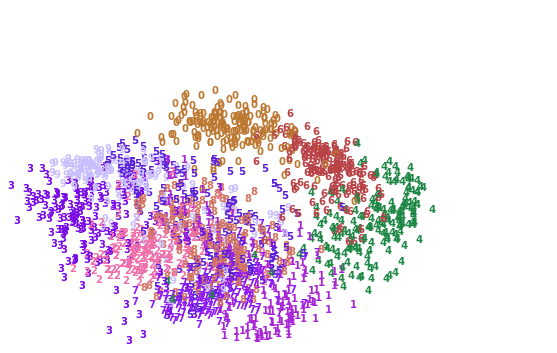

In [160]:
for i in range(comps.shape[0]):
    
    plt.text(comps[i, 0], comps[i, 1], str(y[i]),
             color=c[y[i]],
             fontdict={'weight': 'bold', 'size': 10}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

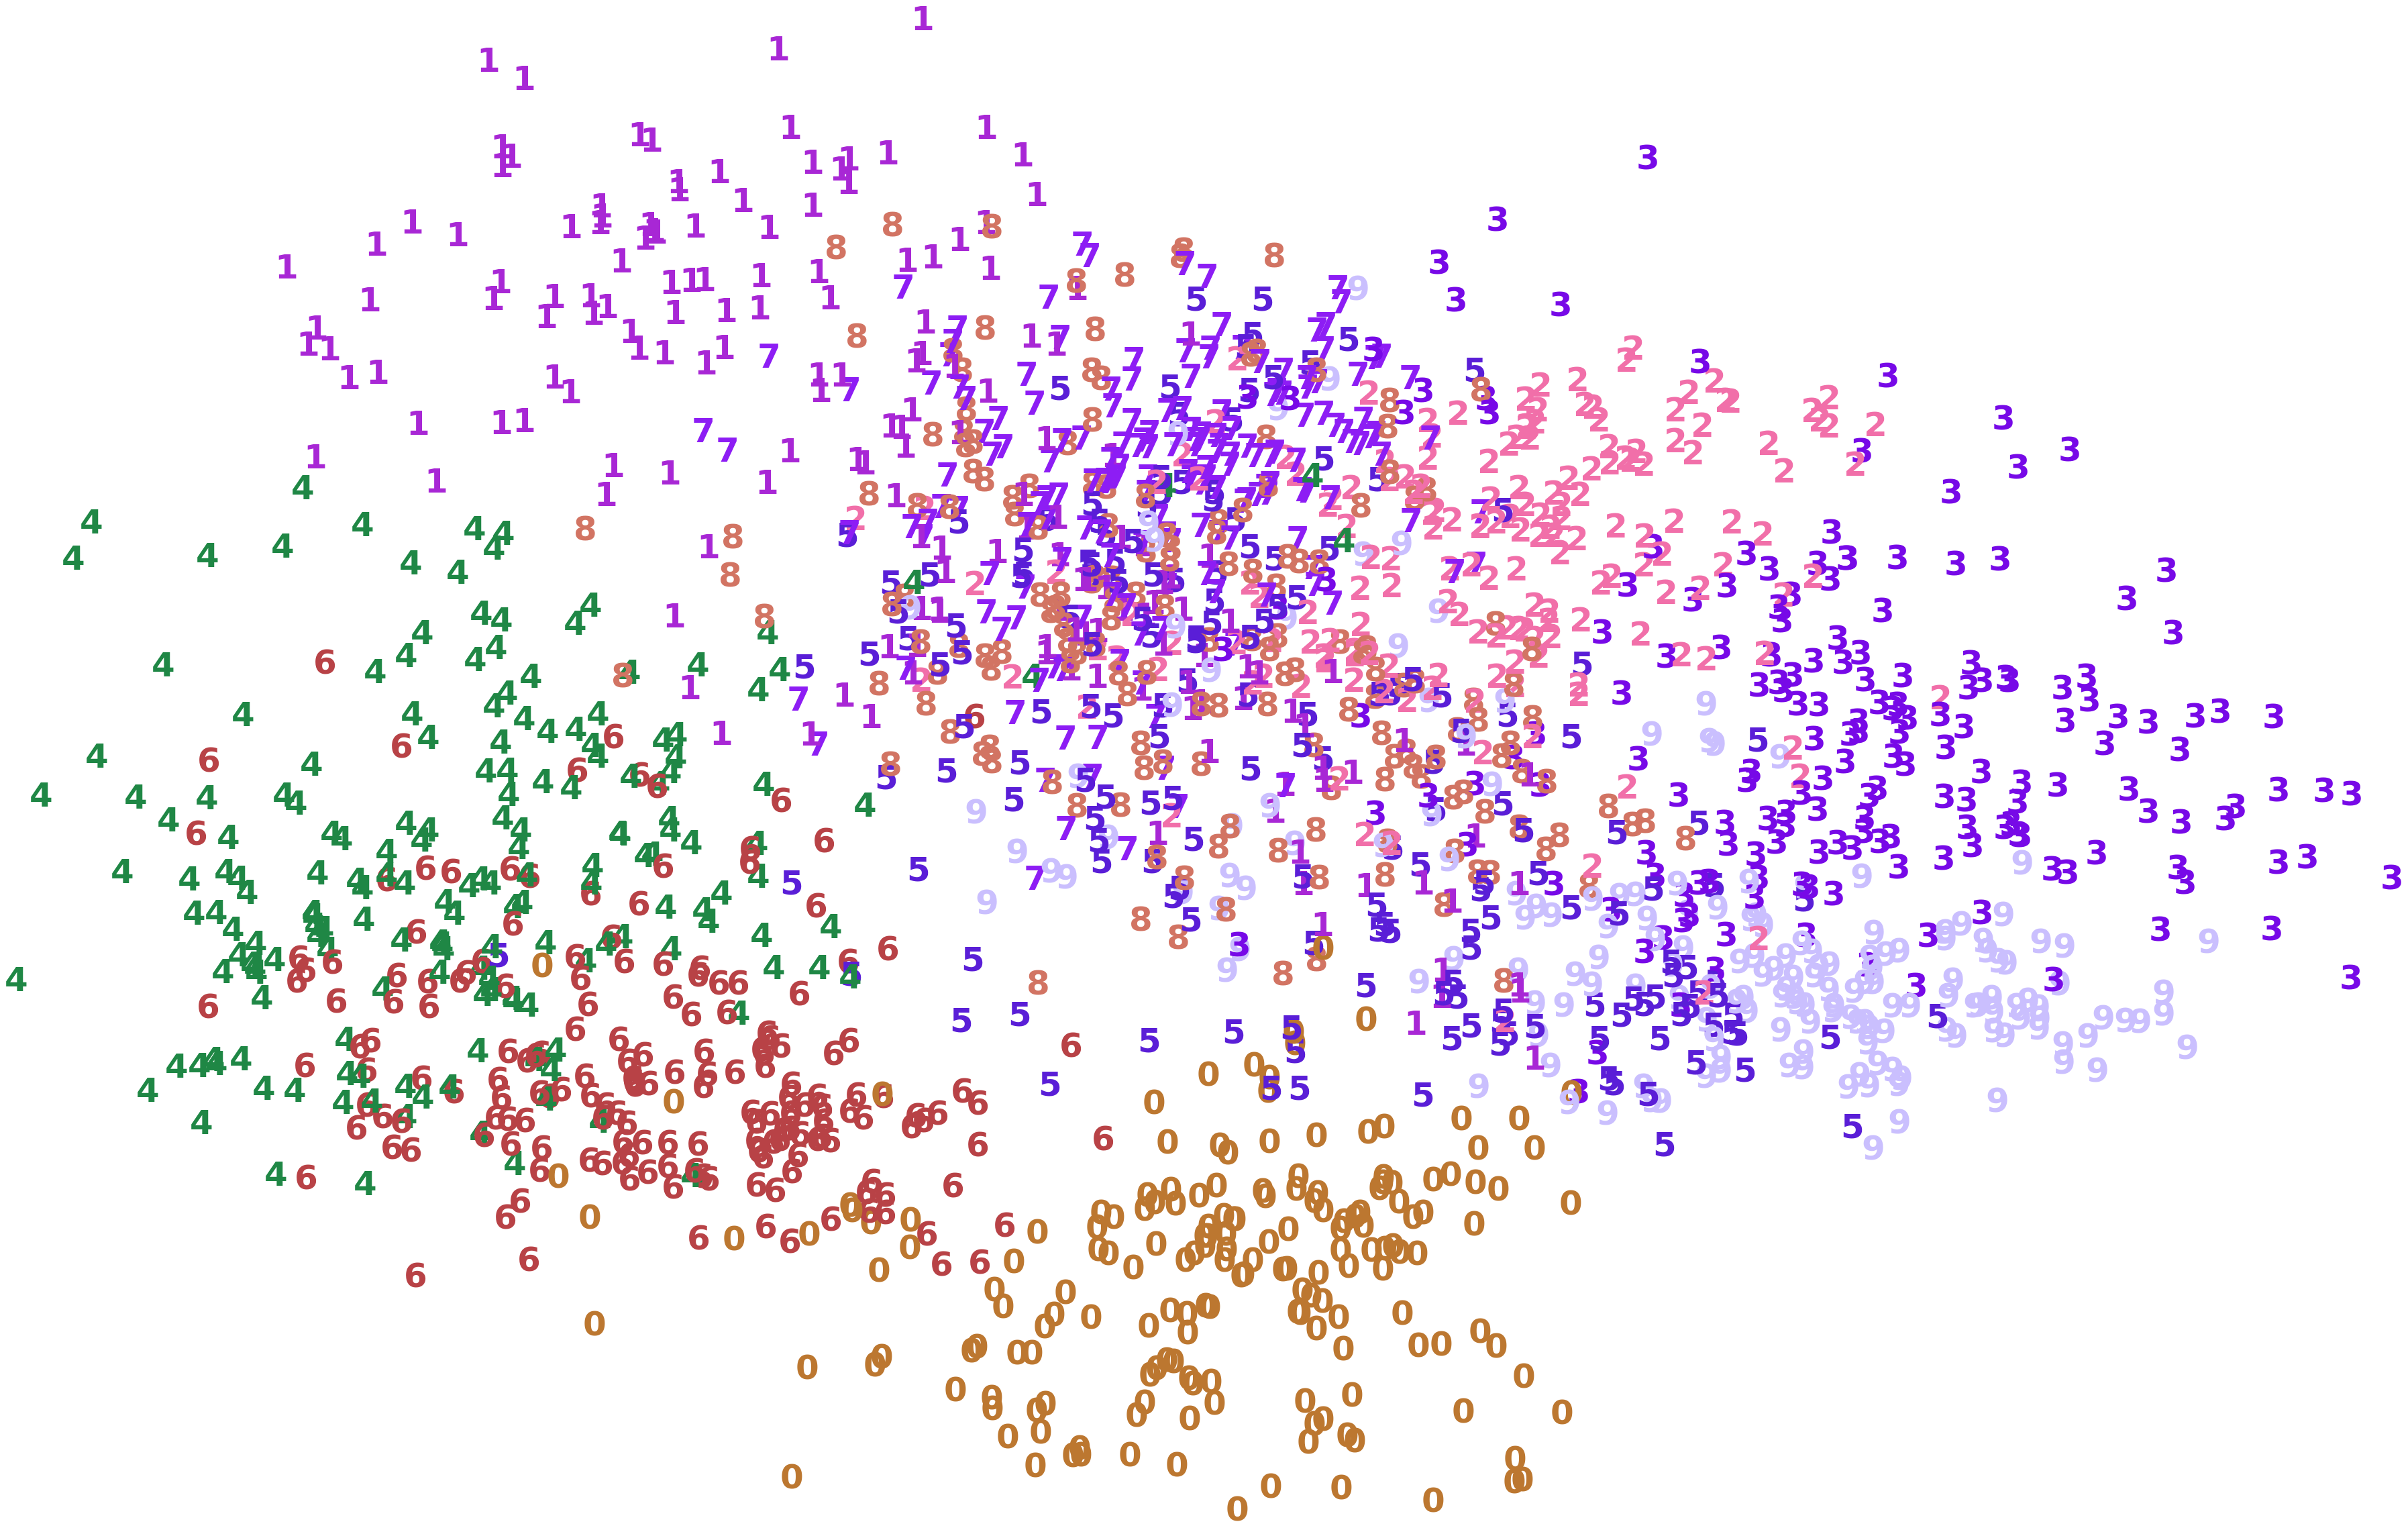

In [163]:
for i in range(kcompspoly.shape[0]):
    
    plt.text(kcompspoly[i, 0], kcompspoly[i, 1], str(y[i]),
             color=c[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

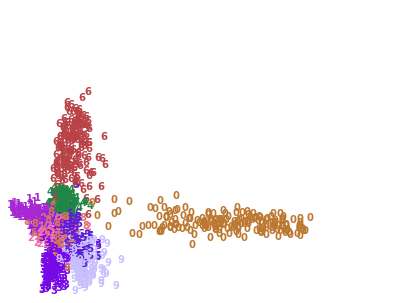

In [169]:
for i in range(kcompsrbf.shape[0]):
    
    plt.text(kcompsrbf[i, 0], kcompsrbf[i, 1], str(y[i]),
             color=c[y[i]],
             fontdict={'weight': 'bold', 'size': 10}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()